### Conversion Percentages

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from get_data import get_data
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [52]:
data = get_data("all")
print("Done!")

Done!


In [53]:
def generate_plot(data, team):
    
    def safe_div(x, y):
        if y == 0:
            return 0
        return x / y
    
    data = data.loc[data.down == 4]

    fourth1_data = data.loc[data.distance == 1]
    fourth2_data = data.loc[data.distance == 2]
    fourth3_data = data.loc[data.distance == 3]
    fourth4_data = data.loc[data.distance == 4]
    fourth5_data = data.loc[data.distance == 5]
    fourth6_data = data.loc[data.distance == 6]
    fourth7_data = data.loc[data.distance == 7]
    fourth8_data = data.loc[data.distance == 8]
    fourth9_data = data.loc[data.distance == 9]

    conv_props_combined = []

    for x in np.arange(1, 10):
        curr = locals()["fourth" + str(x) + "_data"]
        rush = curr[curr.type == "Rush"]
        passes = curr[curr.type == "Pass"]
        sacks = curr[curr.type == "Sack"]
        curr = pd.concat([rush, passes, sacks])
        conv_props_combined.append(safe_div(sum(curr.yardsGained >= x), len(curr.yardsGained >= x)))

    conv_props_rush = []

    for x in np.arange(1, 10):
        curr = locals()["fourth" + str(x) + "_data"]
        curr = curr[curr.type == "Rush"]
        conv_props_rush.append(safe_div(sum(curr.yardsGained >= x), len(curr.yardsGained >= x)))

    conv_props_pass = []

    for x in np.arange(1, 10):
        curr = locals()["fourth" + str(x) + "_data"]
        passes = curr[curr.type == "Pass"]
        sacks = curr[curr.type == "Sack"]
        curr = pd.concat([passes, sacks])
        conv_props_pass.append(safe_div(sum(curr.yardsGained >= x), len(curr.yardsGained >= x)))
    
    fig, ax = plt.subplots(figsize=[12, 8])
    sns.lineplot(x = np.arange(1, 10), y = conv_props_rush, label = "Rush")
    sns.lineplot(x = np.arange(1, 10), y = conv_props_pass, label = "Pass")
    ax.set_title("Fourth Down Conversion Rate for: " + team)
    ax.set_ylabel("Conversion Rate")
    ax.set_xlabel("Yards to Go")
    plt.legend()
    plt.show()

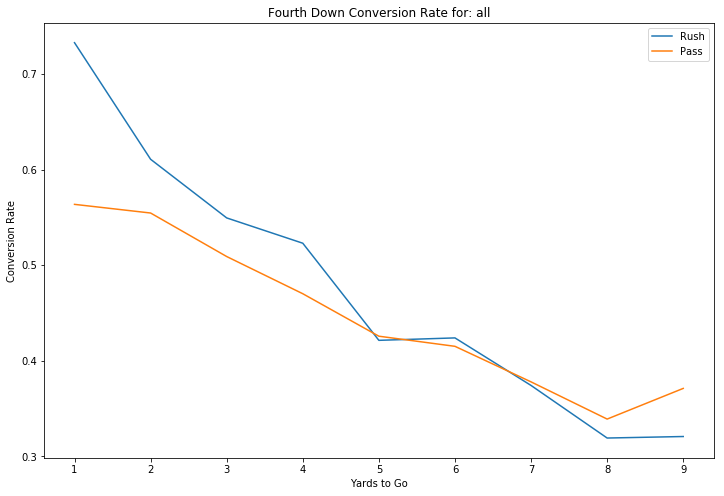

In [55]:
generate_plot(data, "all")

In [1]:
data.type.unique()

NameError: name 'data' is not defined